# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.cluster.hierarchy import linkage,dendrogram

In [2]:
df = pd.read_csv('E:\Rakamin\JAP\Mini Project\Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning\[TASK 1] Conversion Rate Analysis Based on Income, Spending and Ages\Dataset\marketing_campaign_data.csv')
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1196,1196,2246,1965,D3,Menikah,46891000.0,0,1,01-09-2013,91,...,4,0,0,0,0,0,0,3,11,0
1800,1800,2831,1976,S1,Bertunangan,78416000.0,0,1,27-06-2014,99,...,3,0,0,0,0,0,0,3,11,0
1311,1311,8427,1956,S2,Lajang,64857000.0,0,0,23-11-2012,78,...,4,0,0,0,0,0,0,3,11,0
1633,1633,10207,1978,S1,Bertunangan,22775000.0,1,0,19-06-2013,40,...,8,0,0,0,0,0,0,3,11,0
63,63,6518,1951,S3,Janda,67680000.0,0,1,11-06-2013,8,...,5,0,0,0,0,0,0,3,11,0


Import libraries yang mungkin akan digunakan dan import file dataset yang telah didownload, yaitu dataset marketing_campaign_data.csv

# Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0


In [5]:
df.describe(include=object).T

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Dt_Customer,2240,663,31-08-2012,12


Kita periksa apa saja dari data yang perlu diubah dan diproses untuk memaksimalkan hasil Clustering, pada project ini feature enggineering yang dilakukan yaitu:
* Mengubah tipe data yang tidak sesuai (Dt_Customer menjadi datetime)
* mengubah nilai Nan pada income agar mempermudah penentuan User Type, karena pembuatan kolom berdasarkan nilai income
* Membuat kolom baru Total Spent, Total Campaign, Total Children, Total Purchases, Age
* Dari kolom baru diatas ditentukan juga kolom baru lagi yaitu Is Parents, Conversion rate, dan User Type

In [6]:
df_en = df.copy()
df_en.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
863,863,4271,1989,D3,Bertunangan,38683000.0,1,0,04-10-2012,80,...,7,0,0,0,0,0,0,3,11,0
646,646,4611,1970,S1,Bertunangan,105471000.0,0,0,21-01-2013,36,...,3,0,0,1,1,0,0,3,11,1
2047,2047,10701,1973,S1,Menikah,65308000.0,0,0,11-09-2013,60,...,4,0,0,1,1,0,0,3,11,0
375,375,10703,1975,S2,Lajang,46098000.0,1,1,18-08-2012,86,...,8,0,0,0,0,0,0,3,11,0
1880,1880,3074,1984,S3,Menikah,70643000.0,0,0,15-10-2012,66,...,6,0,0,0,0,0,0,3,11,1
2043,2043,5454,1979,S2,Menikah,45057000.0,1,0,01-12-2013,80,...,5,0,0,0,0,0,0,3,11,0
1748,1748,5847,1969,S1,Cerai,69901000.0,0,1,29-05-2013,95,...,5,0,0,0,0,0,0,3,11,0
849,849,10262,1980,S1,Menikah,15072000.0,2,0,10-05-2013,96,...,5,0,0,0,0,0,0,3,11,0
1134,1134,2894,1985,S1,Lajang,72903000.0,0,0,29-10-2013,74,...,4,0,1,1,1,0,0,3,11,1
677,677,9937,1979,S1,Lajang,70337000.0,0,0,02-01-2014,75,...,1,0,0,0,0,0,0,3,11,0


In [7]:
# Pengubahan data tipe dan mengubah nilai NaN, dan penambahan kolom baru
df_en['Dt_Customer'] = pd.to_datetime(df_en['Dt_Customer'])
df_en['Income'] = df_en['Income'].replace(np.nan, 0)
df_en['Age'] = 2022 - df_en['Year_Birth']
df_en['Total_Spent'] = df_en['MntCoke'] + df_en['MntFruits'] + df_en['MntMeatProducts'] + df_en['MntFishProducts'] + df_en['MntSweetProducts'] + df_en['MntGoldProds']
df_en['Total_Campaign'] = df_en['AcceptedCmp1'] + df_en['AcceptedCmp2'] + df_en['AcceptedCmp3'] + df_en['AcceptedCmp4'] + df_en['AcceptedCmp5']
df_en['Total_Children'] = df_en['Kidhome'] + df_en['Teenhome']
df_en['Total_Purchases'] = df_en['NumDealsPurchases'] + df_en['NumWebPurchases'] + df_en['NumCatalogPurchases'] + df_en['NumStorePurchases']
df_en.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spent,Total_Campaign,Total_Children,Total_Purchases
689,689,7279,1969,S3,Bertunangan,69476000.0,0,0,2013-09-30,3,...,0,0,3,11,0,53,1044000,0,0,15
572,572,8181,1978,D3,Lajang,38593000.0,1,0,2013-09-13,42,...,0,0,3,11,0,44,177000,0,1,11
1932,1932,1458,1982,S2,Menikah,21059000.0,1,0,2014-07-01,40,...,0,0,3,11,0,40,44000,0,1,9
2025,2025,9423,1979,S2,Menikah,32765000.0,1,0,2014-02-23,49,...,0,0,3,11,0,43,46000,0,1,8
215,215,1584,1977,S1,Menikah,41443000.0,1,0,2014-01-04,79,...,0,0,3,11,0,45,482000,0,1,20
673,673,3197,1980,S1,Menikah,77353000.0,0,1,2013-12-16,38,...,0,0,3,11,0,42,670000,0,1,20
902,902,6445,1967,S1,Bertunangan,66825000.0,0,0,2013-07-14,73,...,0,0,3,11,0,55,858000,0,0,16
1539,1539,8920,1967,S2,Lajang,59235000.0,1,0,2013-12-01,4,...,0,0,3,11,0,55,1128000,0,1,28
1425,1425,2428,1970,S1,Menikah,28164000.0,1,0,2013-04-05,23,...,0,0,3,11,0,52,78000,0,1,9
678,678,8779,1985,D3,Menikah,36145000.0,1,0,2013-06-16,13,...,0,0,3,11,1,37,172000,1,1,12


In [8]:
# pembuatan kolom baru lanjutan dari kolom sebelumnya
df_en['Is_Parents'] = np.where(df_en['Total_Children'] != 0, 1, 0)
df_en['Age_Group'] = np.select([(df_en['Age'] <= 16),
                                (df_en['Age'] > 16) & (df_en['Age'] <= 30),
                                (df_en['Age'] > 30) & (df_en['Age'] <= 45),
                                (df_en['Age'] > 45)],
                               ['child','young adults','middle-aged adults','old-aged adults'])

df_en['Conversion'] = df_en['Total_Purchases'] / np.where(df_en['NumWebVisitsMonth'] != 0, df_en['NumWebVisitsMonth'], 1)
df_en['User_Type'] = np.select([(df_en['Income'] == 0),
                                (df_en['Income'] <= 20000000),
                                (df_en['Income'] > 20000000) & (df_en['Income'] <= 50000000),
                                (df_en['Income'] > 50000000)],
                               ['not work','low income','medium income','high income'])
df_en.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Response,Age,Total_Spent,Total_Campaign,Total_Children,Total_Purchases,Is_Parents,Age_Group,Conversion,User_Type
811,811,5585,1972,S1,Lajang,21359000.0,1,0,2013-04-20,1,...,1,50,48000,0,1,7,1,old-aged adults,0.875000,medium income
419,419,8581,1971,S2,Menikah,49505000.0,1,1,2013-05-03,4,...,0,51,751000,0,2,29,1,old-aged adults,3.625000,medium income
1190,1190,590,1970,S2,Cerai,78579000.0,0,0,2012-12-22,35,...,1,52,1812000,0,0,16,0,old-aged adults,5.333333,high income
1079,1079,3081,1978,S3,Menikah,41014000.0,1,0,2013-04-22,65,...,0,44,20000,0,1,4,1,middle-aged adults,0.571429,medium income
36,36,4339,1970,S3,Menikah,67353000.0,0,1,2013-12-31,37,...,0,52,913000,0,1,28,1,old-aged adults,14.000000,high income
403,403,615,1960,S1,Bertunangan,30507000.0,0,0,2013-11-03,29,...,0,62,343000,0,0,11,0,old-aged adults,1.571429,medium income
1477,1477,4220,1970,S3,Menikah,59892000.0,0,1,2013-02-11,26,...,0,52,87000,0,1,7,1,old-aged adults,2.333333,high income
1587,1587,2471,1965,S1,Menikah,61482000.0,0,0,2014-06-27,39,...,0,57,299000,0,0,12,0,old-aged adults,6.000000,high income
1197,1197,6606,1969,S2,Menikah,70091000.0,1,0,2013-03-31,11,...,0,53,1161000,1,1,19,1,old-aged adults,2.375000,high income
538,538,11096,1952,D3,Bertunangan,57247000.0,0,1,2013-08-08,50,...,0,70,232000,0,1,12,1,old-aged adults,6.000000,high income


# EDA 

Melakukan analisis untuk data yang akan digunakan untuk data kategorikal dan juga data numerikal 

In [9]:
df_en.describe(include=object).T

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Age_Group,2240,3,old-aged adults,1634
User_Type,2240,4,high income,1156


Manunjukkan jumlah nilai unik pada colom kategorik yang ada pada dataset, Edukasi dan Martial_Status merupakan kolom original dari dataset yang tidak diketahui nilai unik yang dimiliki

In [10]:
# menunjukkan nilai unik kolom kategorical
cats = ['Education', 'Marital_Status', 'Age_Group', 'User_Type']

for col in cats:
  print(f'value counts of column {col}')
  print(df_en[col].value_counts())
  print('---'*10, '\n')

value counts of column Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column Age_Group
old-aged adults       1634
middle-aged adults     578
young adults            28
Name: Age_Group, dtype: int64
------------------------------ 

value counts of column User_Type
high income      1156
medium income     933
low income        127
not work           24
Name: User_Type, dtype: int64
------------------------------ 



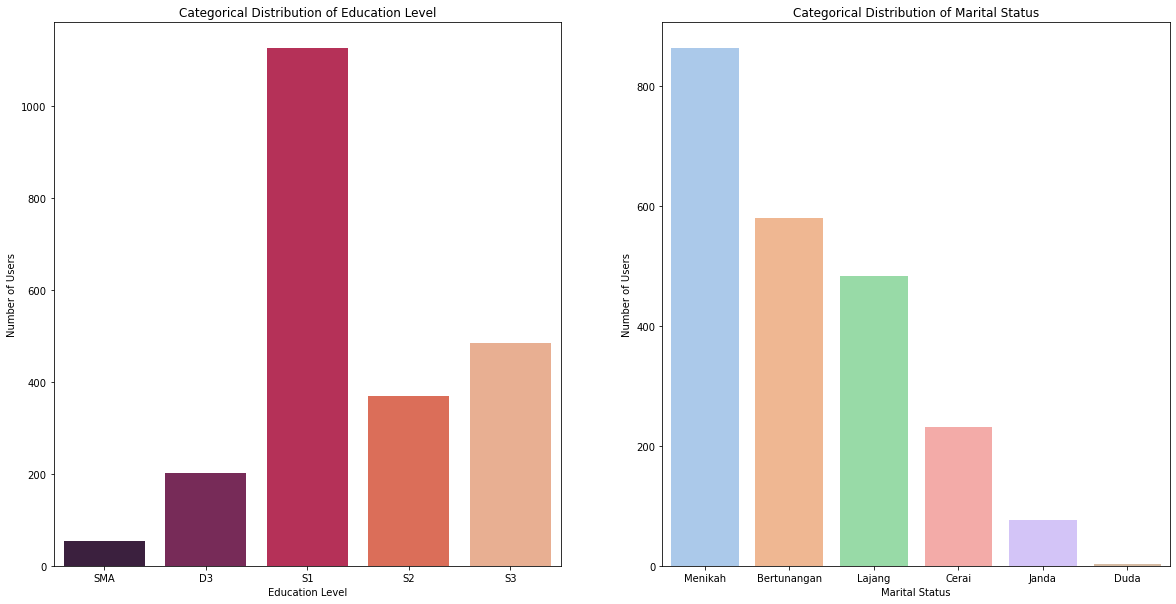

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(ax=axes[0], x=df_en['Education'].value_counts().index, y=df_en['Education'].value_counts().values, palette='rocket', order=['SMA', 'D3', 'S1', 'S2', 'S3'])
axes[0].set_title('Categorical Distribution of Education Level')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Number of Users')

sns.barplot(ax=axes[1], x=df_en['Marital_Status'].value_counts().index, y=df_en['Marital_Status'].value_counts().values, palette='pastel', order=['Menikah', 'Bertunangan', 'Lajang', 'Cerai', 'Janda', 'Duda'])
axes[1].set_title('Categorical Distribution of Marital Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Number of Users')

plt.show()



Pada Education Level kita dapat melihat bahwa kebanyakan dari User/ Customer memiliki Edukasi pada level S1, dan pada Marital Status kebanyakan dari Customer merupakan CCustomer yang sudah Menikah

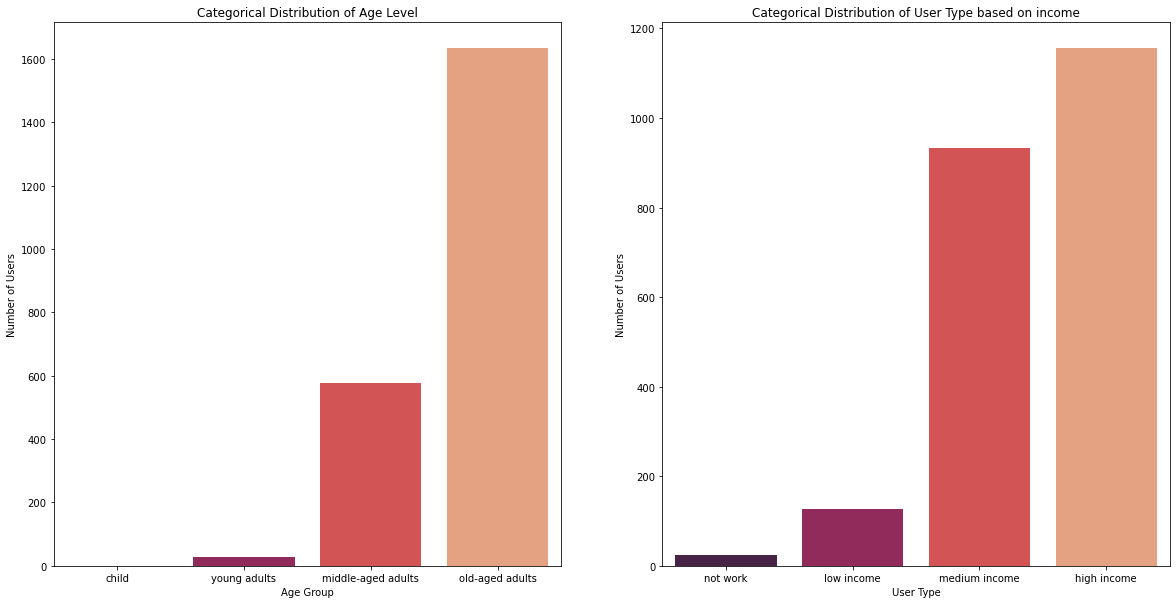

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(ax=axes[0], x=df_en['Age_Group'].value_counts().index, y=df_en['Age_Group'].value_counts().values, palette='rocket', order=['child','young adults','middle-aged adults','old-aged adults'])
axes[0].set_title('Categorical Distribution of Age Level')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Users')

sns.barplot(ax=axes[1], x=df_en['User_Type'].value_counts().index, y=df_en['User_Type'].value_counts().values, palette='rocket', order=['not work','low income','medium income','high income'])
axes[1].set_title('Categorical Distribution of User Type based on income')
axes[1].set_xlabel('User Type')
axes[1].set_ylabel('Number of Users')

plt.show()

Untuk level Umur, kebanyakan dari customer old_aged adults yang berarti berusia lebih dari 45 tahun, dan penghasilan yang dimiliki kebanyakan berada pada hihg income yang berarti dari plot kolom kategorikal kita dapat mengetahui bahwa banyak dari customer merupakan Customer yang kebanyakan berusia pada group usia old-aged group yang telah menikah, memiliki penghasilan yang tinggi dan berpendidikan S1

In [13]:
df_en.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1.119500e+03,1.679250e+03,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5.458500e+03,8.427750e+03,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1.970000e+03,1.977000e+03,1996.0
Income,2240.0,5.168746e+07,2.560934e+07,0.0,34722000.00,5.107500e+07,6.828975e+07,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.000000e+00,1.000000e+00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.000000e+00,1.000000e+00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,4.900000e+01,7.400000e+01,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,1.735000e+05,5.042500e+05,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8.000000e+03,3.300000e+04,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,6.700000e+04,2.320000e+05,1725000.0


In [14]:
nums = ['Recency','Complain','Z_CostContact','Z_Revenue','Response','Total_Spent','Total_Campaign','Total_Children','Total_Purchases','Is_Parents','Conversion']

Untuk kolom Numerikal kita pilih fetaure/kolom yang sebelumnya belum diolah dan hasil olahan feature tersebut yaitu feature-feature yang ada pada variabel nums

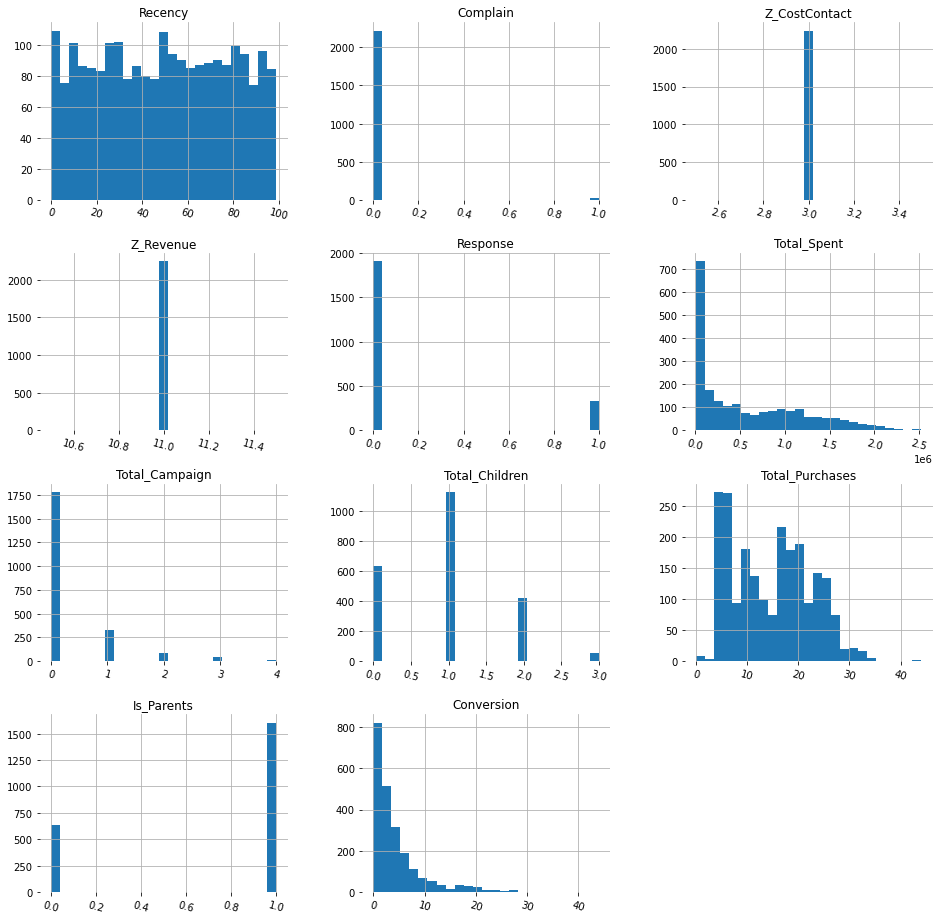

In [15]:
h = df_en[nums].hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

Kita plot dengan histogram bagaimana value yang terkandung pada feature apakah terdapat niulai yang aneh atau tidak,
dari plot diatas dapat dilihat bahwa 'Complain','Z_CostContact', dan 'Z_Revenue' memiliki nilai yang cenderung sama 

<AxesSubplot:>

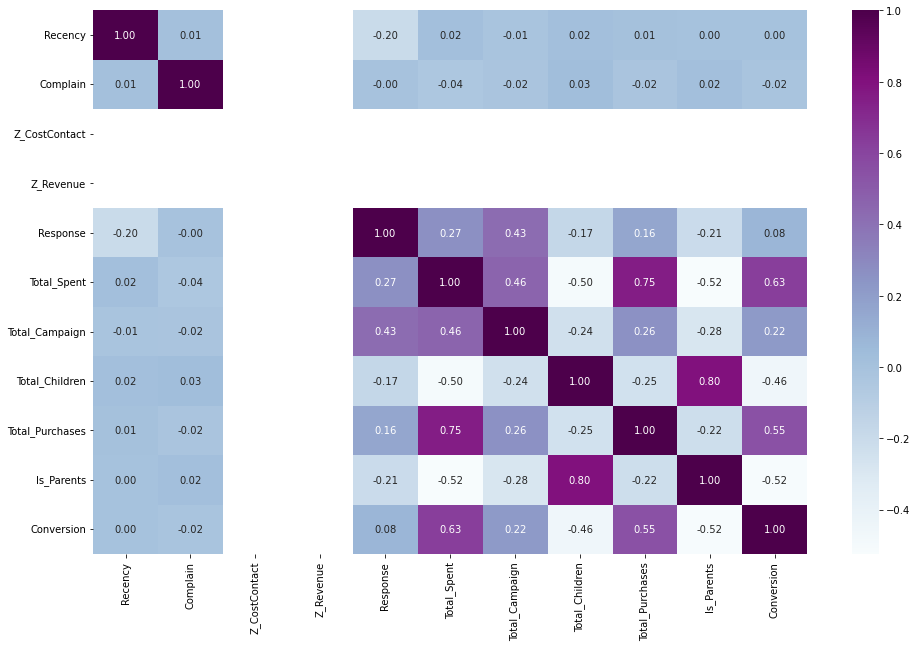

In [16]:
corr_= df_en[nums].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Dari plot corelasi juga dapat dianalisa bahwa 'Recency','Complain','Z_CostContact', dan 'Z_Revenue' memiliki korelasi yang sangat kecil dengan feature lainnya

<Figure size 1080x1080 with 0 Axes>

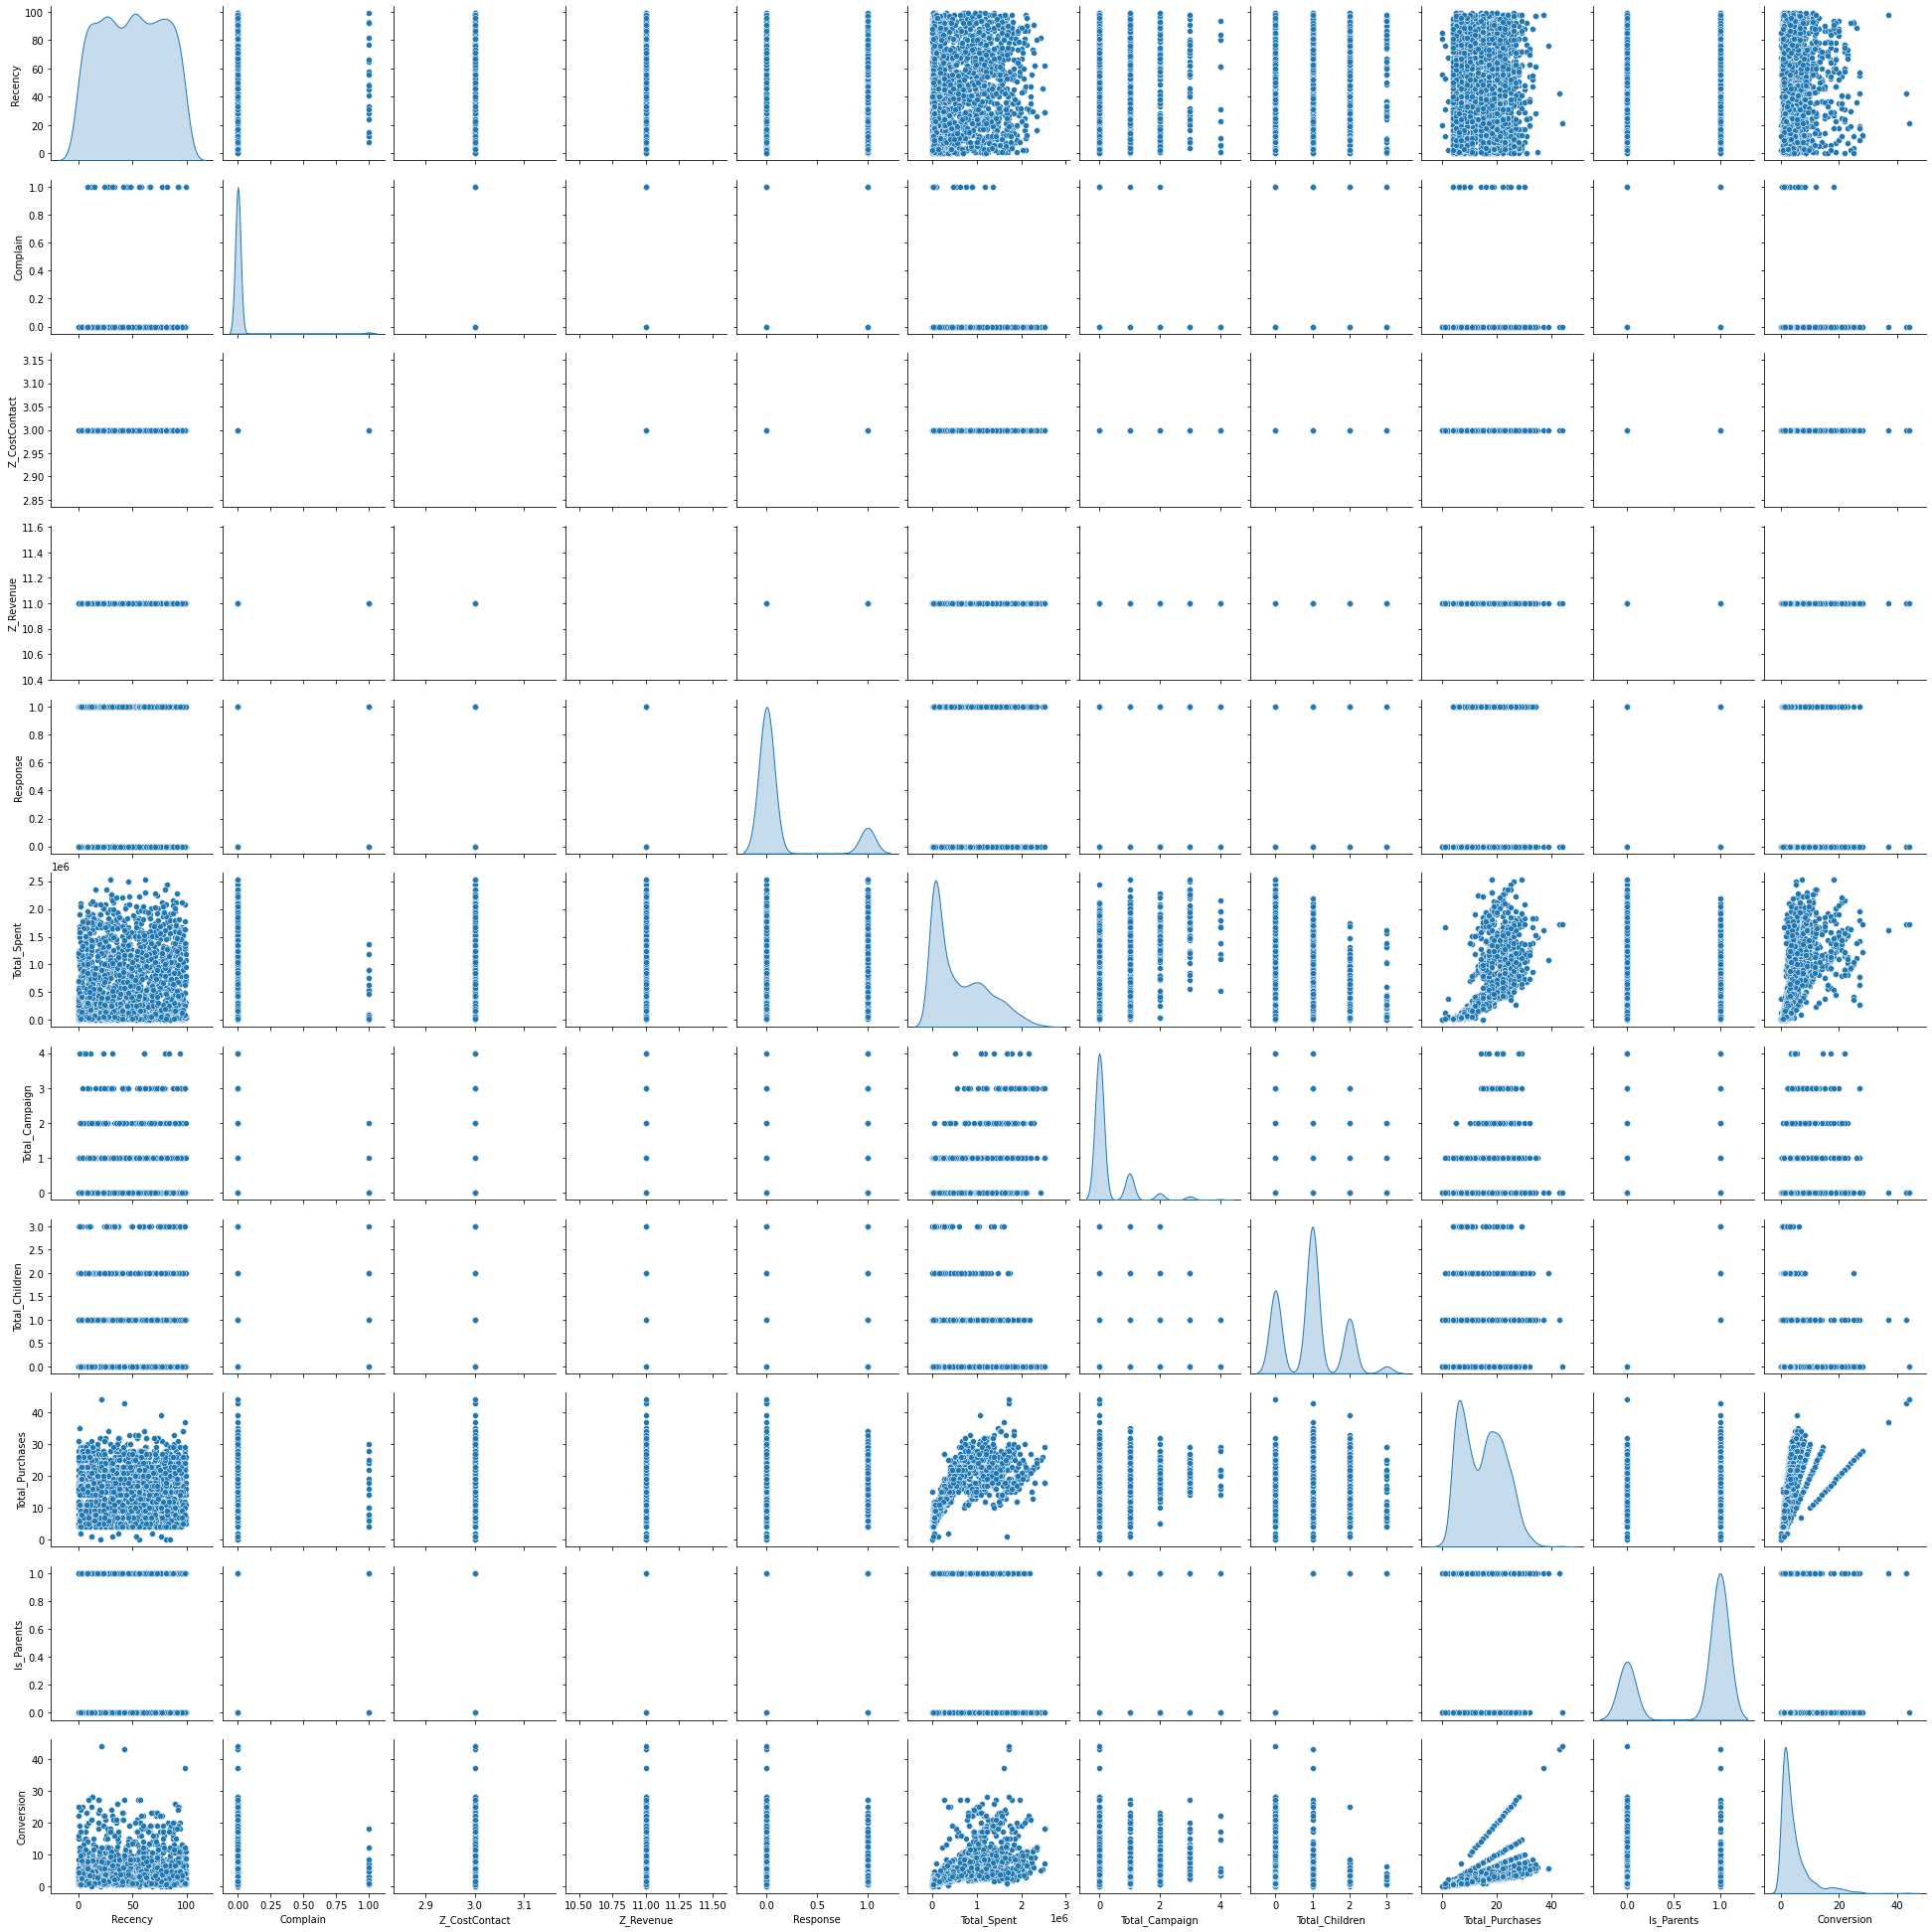

In [17]:
# di sini kita juga hanya menggunakan sample dari full dataset
plt.figure(figsize=(15, 15))
sns.pairplot(df_en[nums], diag_kind='kde')

Untuk Scatter plot hasil dari penyebaran data feature 'Complain','Z_CostContact', dan 'Z_Revenue' juga terlihat tidak baik, jadi feature-feature tersebut akan diolah/ didrop pada proses preprocessing nanti untuk memaksimalkan hasil clustering

In [18]:
# Menggabungkan feature Numerik dan Kategorik
used = nums + cats  

In [19]:
df_use = df_en[used]
df_use.sample(10)

,Recency,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent,Total_Campaign,Total_Children,Total_Purchases,Is_Parents,Conversion,Education,Marital_Status,Age_Group,User_Type
1188,22,0,3,11,0,155000,0,1,10,1,1.250000,S3,Bertunangan,old-aged adults,medium income
573,27,0,3,11,0,279000,0,1,12,1,2.400000,S3,Bertunangan,old-aged adults,high income
1022,81,0,3,11,1,1314000,0,3,25,1,3.571429,S3,Bertunangan,old-aged adults,high income
1025,11,0,3,11,0,702000,0,1,21,1,5.250000,S3,Menikah,old-aged adults,high income
95,30,0,3,11,0,45000,0,1,6,1,1.000000,S1,Menikah,middle-aged adults,medium income
736,69,0,3,11,0,1335000,0,1,19,1,4.750000,S1,Menikah,old-aged adults,high income
205,5,0,3,11,1,35000,1,0,4,0,0.666667,S2,Lajang,middle-aged adults,low income
445,72,0,3,11,0,20000,0,0,4,0,0.500000,S1,Cerai,old-aged adults,medium income
1402,4,0,3,11,0,188000,0,1,10,1,1.428571,S1,Menikah,old-aged adults,medium income
2014,31,0,3,11,1,1655000,0,0,25,0,5.000000,S1,Lajang,old-aged adults,high income


Tabel diatas merupakan feature yang akan diproses pada preprocessing/ data cleaning

# Data Cleaning

In [20]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recency          2240 non-null   int64  
 1   Complain         2240 non-null   int64  
 2   Z_CostContact    2240 non-null   int64  
 3   Z_Revenue        2240 non-null   int64  
 4   Response         2240 non-null   int64  
 5   Total_Spent      2240 non-null   int64  
 6   Total_Campaign   2240 non-null   int64  
 7   Total_Children   2240 non-null   int64  
 8   Total_Purchases  2240 non-null   int64  
 9   Is_Parents       2240 non-null   int32  
 10  Conversion       2240 non-null   float64
 11  Education        2240 non-null   object 
 12  Marital_Status   2240 non-null   object 
 13  Age_Group        2240 non-null   object 
 14  User_Type        2240 non-null   object 
dtypes: float64(1), int32(1), int64(9), object(4)
memory usage: 253.9+ KB


## Memeriksa data Null dan data duplikat

In [21]:
# Memeriksa apakah ada data Null
df_use.isna().sum()

Recency            0
Complain           0
Z_CostContact      0
Z_Revenue          0
Response           0
Total_Spent        0
Total_Campaign     0
Total_Children     0
Total_Purchases    0
Is_Parents         0
Conversion         0
Education          0
Marital_Status     0
Age_Group          0
User_Type          0
dtype: int64

In [22]:
# memeriksa apakah ada data duplikat
df_use.duplicated().sum()

183

In [23]:
# Meperlihatkan baris duplikat
df_use.loc[df_use.duplicated(), :]

,Recency,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent,Total_Campaign,Total_Children,Total_Purchases,Is_Parents,Conversion,Education,Marital_Status,Age_Group,User_Type
83,56,0,3,11,0,318000,0,0,11,0,3.666667,S2,Bertunangan,old-aged adults,medium income
179,44,0,3,11,0,978000,1,0,25,0,12.500000,D3,Menikah,old-aged adults,high income
281,84,0,3,11,0,576000,0,1,16,1,2.000000,S1,Bertunangan,old-aged adults,high income
282,20,0,3,11,0,317000,0,0,13,0,1.857143,S1,Bertunangan,old-aged adults,medium income
363,31,0,3,11,0,25000,0,1,4,1,0.444444,S3,Menikah,middle-aged adults,medium income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,40,0,3,11,0,15000,0,1,4,1,0.500000,S1,Bertunangan,middle-aged adults,medium income
2221,12,0,3,11,1,1438000,2,0,21,0,21.000000,S2,Lajang,middle-aged adults,high income
2225,55,0,3,11,0,586000,0,2,22,1,3.142857,S1,Bertunangan,old-aged adults,high income
2234,81,0,3,11,0,30000,0,1,4,1,0.571429,S1,Menikah,old-aged adults,medium income


In [24]:
# drop duplicates rows
df_dup = df_use.drop_duplicates()
df_dup.duplicated().sum()

0

In [25]:
# Drop kolom yang dianggap berpengaruh kecil untuk model
df_drop = df_dup.copy()
df_drop = df_drop.drop(['Recency','Complain','Z_CostContact','Z_Revenue'],axis =1)
df_drop.sample(10)

,Response,Total_Spent,Total_Campaign,Total_Children,Total_Purchases,Is_Parents,Conversion,Education,Marital_Status,Age_Group,User_Type
856,0,41000,0,1,5,1,0.714286,S2,Menikah,old-aged adults,medium income
438,0,122000,0,1,10,1,1.428571,S3,Menikah,old-aged adults,medium income
431,0,684000,0,1,21,1,2.625000,S1,Menikah,middle-aged adults,medium income
724,1,71000,1,1,12,1,1.333333,S1,Menikah,old-aged adults,low income
1032,0,1091000,0,0,16,0,8.000000,S1,Bertunangan,old-aged adults,high income
1006,0,859000,0,1,23,1,7.666667,S2,Menikah,old-aged adults,high income
263,0,25000,0,1,4,1,0.444444,S3,Menikah,middle-aged adults,medium income
1942,0,42000,0,1,5,1,0.714286,S1,Lajang,middle-aged adults,medium income
628,0,103000,0,2,9,1,1.000000,S3,Cerai,middle-aged adults,medium income
2224,0,679000,1,1,22,1,5.500000,S3,Lajang,old-aged adults,high income


Tabel diatas merupakan feature yang akan di encode dan standarisai agar memaksimalkan hasil clustering

## Feature Encoding

In [26]:
# Featuure encode seluruh tipe kategorical, terdapat pula yang menyisakan 1 untuk di jadikan target tetapi pada project ini di analisis lebih ke cluster
df_onehot = df_drop.copy()
for cat in ['Education', 'Marital_Status', 'Age_Group','User_Type']:
    onehots = pd.get_dummies(df_onehot[cat], prefix=cat)
    df_onehot = df_onehot.join(onehots)

In [27]:
df_onehot = df_onehot.drop(['Education', 'Marital_Status', 'Age_Group','User_Type'],axis=1)
df_onehot.sample(10)

,Response,Total_Spent,Total_Campaign,Total_Children,Total_Purchases,Is_Parents,Conversion,Education_D3,Education_S1,Education_S2,...,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_middle-aged adults,Age_Group_old-aged adults,Age_Group_young adults,User_Type_high income,User_Type_low income,User_Type_medium income,User_Type_not work
2025,0,46000,0,1,8,1,1.600000,0,0,1,...,0,0,1,1,0,0,0,0,1,0
360,0,2153000,1,0,22,0,11.000000,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2140,0,22000,0,1,5,1,0.625000,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1421,0,817000,0,0,23,0,23.000000,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1797,0,76000,0,1,8,1,1.333333,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2157,0,28000,0,1,5,1,1.666667,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1276,0,30000,1,1,4,1,0.666667,0,0,1,...,0,0,1,0,1,0,0,0,1,0
873,0,182000,0,2,12,1,1.714286,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1116,1,63000,1,1,5,1,0.625000,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1449,0,690000,0,1,17,1,8.500000,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [28]:
df_onehot.describe().T

,count,mean,std,min,25%,50%,75%,max
Response,2057.0,0.151677,0.358795,0.0,0.00,0.000000,0.0,1.0
Total_Spent,2057.0,606329.120078,602971.415824,5000.0,69000.00,396000.000000,1047000.0,2525000.0
Total_Campaign,2057.0,0.300438,0.678437,0.0,0.00,0.000000,0.0,4.0
Total_Children,2057.0,0.954789,0.748798,0.0,0.00,1.000000,1.0,3.0
Total_Purchases,2057.0,14.867282,7.664752,0.0,8.00,15.000000,21.0,44.0
Is_Parents,2057.0,0.719494,0.449356,0.0,0.00,1.000000,1.0,1.0
Conversion,2057.0,4.479870,5.105826,0.0,1.25,2.666667,5.4,44.0
Education_D3,2057.0,0.091395,0.288240,0.0,0.00,0.000000,0.0,1.0
Education_S1,2057.0,0.500729,0.500121,0.0,0.00,1.000000,1.0,1.0
Education_S2,2057.0,0.165775,0.371969,0.0,0.00,0.000000,0.0,1.0


# Standarisasi

In [29]:
# standarisasi berdasarkan hasil onehot encode
feats = ['Response','Total_Spent','Total_Campaign','Total_Children','Total_Purchases','Is_Parents','Conversion',
         'Education_D3','Education_S1','Education_S2','Education_S3','Education_SMA',
         'Marital_Status_Bertunangan','Marital_Status_Cerai','Marital_Status_Duda','Marital_Status_Janda','Marital_Status_Lajang','Marital_Status_Menikah',
         'Age_Group_middle-aged adults','Age_Group_old-aged adults','Age_Group_young adults',
         'User_Type_high income','User_Type_low income','User_Type_medium income','User_Type_not work']



df_std = df_onehot.copy()
sc = StandardScaler()
df_std[feats] = sc.fit_transform(df_std[feats])
df_std.sample(10)

,Response,Total_Spent,Total_Campaign,Total_Children,Total_Purchases,Is_Parents,Conversion,Education_D3,Education_S1,Education_S2,...,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_middle-aged adults,Age_Group_old-aged adults,Age_Group_young adults,User_Type_high income,User_Type_low income,User_Type_medium income,User_Type_not work
457,2.364942,-0.566216,1.031389,0.060393,-0.113180,0.624392,-0.420512,-0.317157,-1.001459,2.243270,...,-0.189077,-0.529926,1.259929,1.690943,-1.639018,-0.11092,-1.038161,-0.245579,1.192833,-0.108652
649,-0.422843,-0.012158,-0.442945,0.060393,0.278318,0.624392,-0.211549,-0.317157,0.998543,-0.445778,...,-0.189077,-0.529926,-0.793695,-0.591386,0.610121,-0.11092,0.963242,-0.245579,-0.838340,-0.108652
44,-0.422843,-0.954389,-0.442945,0.060393,-0.896174,0.624392,-0.564173,-0.317157,-1.001459,2.243270,...,-0.189077,-0.529926,1.259929,-0.591386,0.610121,-0.11092,-1.038161,4.072002,-0.838340,-0.108652
477,-0.422843,-0.146525,-0.442945,0.060393,0.278318,0.624392,-0.211549,-0.317157,-1.001459,2.243270,...,-0.189077,-0.529926,1.259929,1.690943,-1.639018,-0.11092,0.963242,-0.245579,-0.838340,-0.108652
1883,-0.422843,0.563465,1.031389,0.060393,1.061312,0.624392,1.375260,-0.317157,-1.001459,2.243270,...,-0.189077,1.887055,-0.793695,-0.591386,0.610121,-0.11092,0.963242,-0.245579,-0.838340,-0.108652
940,-0.422843,0.852106,-0.442945,1.396192,0.930813,0.624392,-0.159308,3.153013,-1.001459,-0.445778,...,-0.189077,1.887055,-0.793695,-0.591386,0.610121,-0.11092,0.963242,-0.245579,-0.838340,-0.108652
691,-0.422843,0.581713,-0.442945,-1.275405,-0.243679,-1.601559,0.395748,-0.317157,0.998543,-0.445778,...,-0.189077,1.887055,-0.793695,-0.591386,0.610121,-0.11092,0.963242,-0.245579,-0.838340,-0.108652
723,-0.422843,2.223981,-0.442945,-1.275405,0.147819,-1.601559,0.167195,-0.317157,0.998543,-0.445778,...,-0.189077,-0.529926,1.259929,-0.591386,0.610121,-0.11092,0.963242,-0.245579,-0.838340,-0.108652
1853,2.364942,1.605227,-0.442945,-1.275405,-0.113180,-1.601559,0.036594,-0.317157,0.998543,-0.445778,...,-0.189077,-0.529926,-0.793695,-0.591386,0.610121,-0.11092,0.963242,-0.245579,-0.838340,-0.108652
2190,2.364942,1.721347,-0.442945,-1.275405,1.322310,-1.601559,1.571162,-0.317157,-1.001459,2.243270,...,-0.189077,1.887055,-0.793695,1.690943,-1.639018,-0.11092,0.963242,-0.245579,-0.838340,-0.108652


In [30]:
df_fin = df_std.copy()

# Elbow method

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


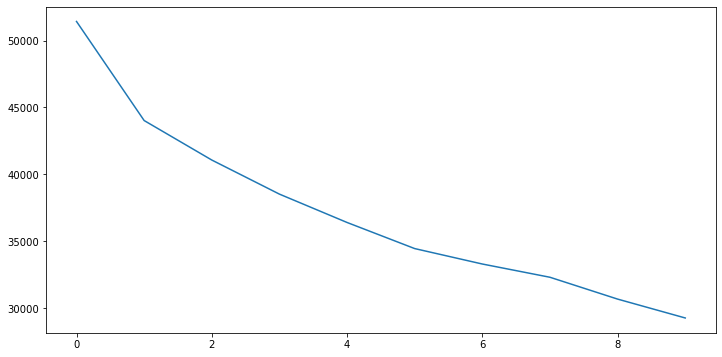

In [31]:
# Elbow Method digunakan untuk mengetahui jumlah cluster yang paling bagus untuk digunakan
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(df_fin.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia)

hasil elbow berada pada angka n=5 clustering, jadi cluster yang didapatkan papa project ini sebanyak lima yaitu cluster [0,1,2,3,4]

# Clustering K-mean

In [32]:
# Metode K-means
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=10)
kmeans.fit(df_fin.values)

KMeans(n_clusters=5, random_state=10)

In [33]:
df_labeled = df_onehot.copy()
df_labeled['clusters'] = kmeans.labels_
df_labeled.sample(10)

,Response,Total_Spent,Total_Campaign,Total_Children,Total_Purchases,Is_Parents,Conversion,Education_D3,Education_S1,Education_S2,...,Marital_Status_Lajang,Marital_Status_Menikah,Age_Group_middle-aged adults,Age_Group_old-aged adults,Age_Group_young adults,User_Type_high income,User_Type_low income,User_Type_medium income,User_Type_not work,clusters
1894,0,801000,0,0,11,0,11.000000,0,1,0,...,1,0,0,1,0,1,0,0,0,2
184,0,43000,0,0,6,0,1.000000,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1118,0,96000,0,0,6,0,0.750000,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1122,0,332000,0,2,16,1,2.285714,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1773,0,1165000,0,0,17,0,17.000000,0,0,0,...,0,0,0,1,0,1,0,0,0,2
1160,0,301000,0,1,12,1,2.400000,0,1,0,...,0,1,0,1,0,0,0,1,0,1
1369,0,251000,0,1,11,1,5.500000,0,1,0,...,0,1,0,1,0,1,0,0,0,0
2238,0,843000,0,1,23,1,7.666667,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1698,0,32000,0,2,5,1,0.714286,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2136,0,258000,1,2,15,1,2.500000,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [34]:
df_labeled['clusters'].value_counts()[[0,1,2,3,4]]

0    574
1    585
2    465
3    116
4    317
Name: clusters, dtype: int64

Hasil Cluster yang didapat menunjukkan bahwa niali Cluster 1 merupakan cluster dengan nilai terbanyak dan Cluster 0 sebagai peringkat ke 2 terbanyak

# Shilouete Score

In [35]:
# Mencari Nilai Shilouete Score dengan plot 
range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std)
    preds = kmeans.predict(df_std)
    
    score_euclidean = silhouette_score(df_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<AxesSubplot:>

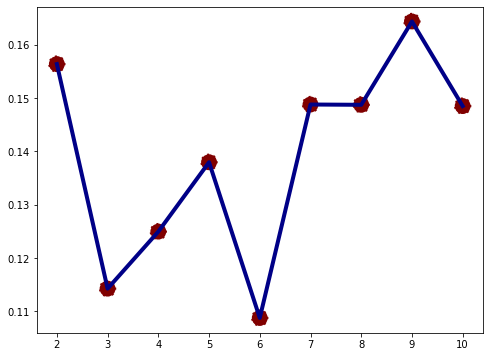

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

# PCA For Visualization

In [37]:
# Visualisasi Cluster dengan PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = df_labeled['clusters'].values
df_pca.head()

,PC 1,PC 2,clusters
0,3.012004,0.458950,2
1,-2.549284,-0.482901,1
2,1.928457,-0.233725,2
3,-2.319754,1.833396,4
4,0.230775,0.827451,0


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

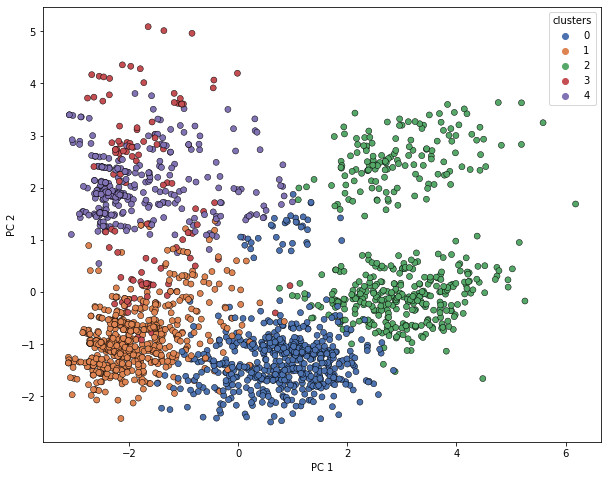

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca, x='PC 1', y='PC 2', hue='clusters',edgecolor='black',palette="deep" )

Dari Plot PCA dapat dianalisis bahwa untuk cluster 1 dan 0 nilainya lebih dekat atau rapih pengelompokannya dibandingkan cluster yang lain

# Pemilihan Cluster

Karena nilainya yang banyak dengan selisih yang sedikit, dan juga hasil plot yang lebih rapih dibandingkan hasil cluster yang lain maka cluster yang dipilih untuk retargeting marketing adalah cluster 1 dan 0

In [39]:
# berikut ditampilkan aggregasi mean dan median untuk seluruh cluster 
display(df_labeled.groupby('clusters').agg(['mean','median']))

Response          Total_Spent            Total_Campaign         \
              mean median          mean     median           mean median   
clusters                                                                   
0         0.087108    0.0  7.853484e+05   765000.0       0.249129    0.0   
1         0.111111    0.0  1.585043e+05    78000.0       0.094017    0.0   
2         0.326882    0.0  1.378578e+06  1366000.0       0.797849    0.0   
3         0.103448    0.0  6.011207e+04    49000.0       0.103448    0.0   
4         0.104101    0.0  1.756845e+05    76000.0       0.116719    0.0   

         Total_Children        Total_Purchases         ...  \
                   mean median            mean median  ...   
clusters                                               ...   
0              1.257840    1.0       20.156794   21.0  ...   
1              1.379487    1.0        9.670085    8.0  ...   
2              0.030108    0.0       20.346237   20.0  ...   
3              0.922414    1.0        7.663793    7.0  ...   
4              0.990536    1.0        9.479495    8.0  ...   

         Age_Group_young adults        User_Type_high income         \
                           mean median                  mean median   
clusters                                                              
0                      0.000000    0.0              0.993031    1.0   
1                      0.000000    0.0              0.001709    0.0   
2                      0.032258    0.0              0.976344    1.0   
3                      0.051724    0.0              0.000000    0.0   
4                      0.012618    0.0              0.132492    0.0   

         User_Type_low income        User_Type_medium income         \
                         mean median                    mean median   
clusters                                                              
0                    0.000000    0.0                0.000000    0.0   
1                    0.000000    0.0                0.977778    1.0   
2                    0.002151    0.0                0.012903    0.0   
3                    1.000000    1.0                0.000000    0.0   
4                    0.000000    0.0                0.854890    1.0   

         User_Type_not work         
                       mean median  
clusters                            
0                  0.006969    0.0  
1                  0.020513    0.0  
2                  0.008602    0.0  
3                  0.000000    0.0  
4                  0.012618    0.0  

[5 rows x 50 columns]

In [40]:
df_clustering = df_labeled.copy()
cluster_0=df_clustering[df_clustering['clusters']==0]
cluster_1=df_clustering[df_clustering['clusters']==1]
cluster_2=df_clustering[df_clustering['clusters']==2]
cluster_3=df_clustering[df_clustering['clusters']==3]
cluster_4=df_clustering[df_clustering['clusters']==4]

### Aggregasi dan Deskripsi dari Cluster 1 dan 0 

In [41]:
cluster_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Response,585.0,0.111111,0.314539,0.0,0.000,0.000000,0.0,1.0
Total_Spent,585.0,158504.273504,177717.348307,6000.0,41000.000,78000.000000,235000.0,1143000.0
Total_Campaign,585.0,0.094017,0.303600,0.0,0.000,0.000000,0.0,2.0
Total_Children,585.0,1.379487,0.723568,0.0,1.000,1.000000,2.0,3.0
Total_Purchases,585.0,9.670085,5.167954,0.0,6.000,8.000000,13.0,30.0
Is_Parents,585.0,0.905983,0.292102,0.0,1.000,1.000000,1.0,1.0
Conversion,585.0,1.595584,1.019587,0.0,0.875,1.333333,2.0,11.0
Education_D3,585.0,0.080342,0.272054,0.0,0.000,0.000000,0.0,1.0
Education_S1,585.0,0.476923,0.499895,0.0,0.000,0.000000,1.0,1.0
Education_S2,585.0,0.198291,0.399053,0.0,0.000,0.000000,0.0,1.0


In [42]:
display(cluster_1.agg(['mean','median']).T)

,mean,median
Response,0.111111,0.000000
Total_Spent,158504.273504,78000.000000
Total_Campaign,0.094017,0.000000
Total_Children,1.379487,1.000000
Total_Purchases,9.670085,8.000000
Is_Parents,0.905983,1.000000
Conversion,1.595584,1.333333
Education_D3,0.080342,0.000000
Education_S1,0.476923,0.000000
Education_S2,0.198291,0.000000


Dapat dilihat pada tabel descripsi dan aggregasi bahwa Cluster 1 merupakan Customer dengan : 
* Total Spent = rata-rata : sekitar 78000.000000
* Total Campaign = max :2, kebanyakan masih belum 
* Total Children = max: 3, kebanyakannya memiliki anak
* Total Purchases = rata-rata : sekitar 8.000000 sampai 9.500000
* Conversion = rata-rata : sekitar 1.5
* Education = terdapat yang beredukasi di setiap level pada deskripsi tetapi untuk kebanyakan data tidak dipentingkan 
* Martial Status = terdapat untuk setiap jenis tetapi untuk kebanyakan data tidak dipentingkan
* Age Group = Terdapat terbanyak pada cluster pada group old-aged adults
* User Type = Terdapat terbanyak pada cluster pada tipe medium income

Jadi dari hasil tersebut dapat disimpulkan bahwa Customer pada Cluster 1 yaitu :
> Customer masih belum mendapatkan campaign, memiliki anak, melakukan Total Spent sekitar 78000.000000 dan Total Purchases sekitar 8.000000 dengan Conversion rate 1.5 (150%) yang berada pada Usia lebih dari 45 tahun dan penghasilan medium

In [43]:
cluster_0.describe().T

,count,mean,std,min,25%,50%,75%,max
Response,574.0,0.087108,0.282239,0.0,0.000000,0.0,0.0,1.0
Total_Spent,574.0,785348.432056,442734.061332,8000.0,456000.000000,765000.0,1073000.0,2092000.0
Total_Campaign,574.0,0.249129,0.530689,0.0,0.000000,0.0,0.0,3.0
Total_Children,574.0,1.257840,0.511371,0.0,1.000000,1.0,1.0,3.0
Total_Purchases,574.0,20.156794,6.533294,0.0,16.000000,21.0,25.0,39.0
Is_Parents,574.0,0.993031,0.083260,0.0,1.000000,1.0,1.0,1.0
Conversion,574.0,4.490396,2.575637,0.0,2.857143,4.0,5.4,22.0
Education_D3,574.0,0.055749,0.229637,0.0,0.000000,0.0,0.0,1.0
Education_S1,574.0,0.484321,0.500190,0.0,0.000000,0.0,1.0,1.0
Education_S2,574.0,0.170732,0.376603,0.0,0.000000,0.0,0.0,1.0


In [44]:
display(cluster_0.agg(['mean','median']).T)

,mean,median
Response,0.087108,0.0
Total_Spent,785348.432056,765000.0
Total_Campaign,0.249129,0.0
Total_Children,1.257840,1.0
Total_Purchases,20.156794,21.0
Is_Parents,0.993031,1.0
Conversion,4.490396,4.0
Education_D3,0.055749,0.0
Education_S1,0.484321,0.0
Education_S2,0.170732,0.0


Dapat dilihat pada tabel descripsi dan aggregasi bahwa Cluster 0 merupakan Customer dengan : 
* Total Spent = rata-rata : sekitar 765000.0
* Total Campaign = max :3, kebanyakan masih belum 
* Total Children = max: 3, kebanyakannya memiliki anak
* Total Purchases = rata-rata : sekitar 20.000000 sampai 21.000000
* Conversion = rata-rata : sekitar 4
* Education = terdapat yang beredukasi di setiap level pada deskripsi tetapi untuk kebanyakan data tidak dipentingkan 
* Martial Status = terdapat untuk setiap jenis tetapi untuk kebanyakan data tidak dipentingkan
* Age Group = Terdapat terbanyak pada cluster pada group old-aged adults
* User Type = Terdapat terbanyak pada cluster pada tipe high income

Jadi dari hasil tersebut dapat disimpulkan bahwa Customer pada Cluster 0 yaitu :
> Customer masih belum mendapatkan campaign, memiliki anak, melakukan Total Spent sekitar 765000.0 dan Total Purchases sekitar 20.000000 dengan Conversion rate 4 (400%) yang berada pada Usia lebih dari 45 tahun dan penghasilan high

Jadi dari kedua Cluster tersebut kita dapat menyimpulkan bahwa Marketing Retargeting ditujukan pada:
> Customer yang belum mendapatkan campaign, dengan rata-rata Total spent 750000 keatas atau Total Purchases 8.000000 keatas (penghasilan medium to high), yang sering menggunakan website (hasil conversion rate), memiliki anak dan berusia diatas 45 tahun

# Potential Impact

Potensi dari pemilihan cluster 1 dan 0 yaitu:
* Customer yang belum pernah menerima campaign dapat diberikan campaign, dan promosi agar menggunakannya
* Customer dapat memberikan promo untuk Customer berusia 45 tahun keatas yang memilki anak dengan peoduk-produk keluarga
* Customer yang spending diatas angka tertentu dapat diberikan promo agar ingin bertransaksi lagi 

Terima Kasih